Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

#import src
import FileProcessing
import ModelClass

import random
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow
from tensorflow.keras import layers

Loading the cleaned ngsim data using pandas

In [2]:
fileProcessing=FileProcessing.FileProcessing()

In [3]:
model_obj=ModelClass.ModelClass()
#model1=ModelClass.ModelClass()
#model_obj=ModelClass()

In [4]:
file_name='Cleaned_NGSIM_Data'
ngsim=fileProcessing.read_input(file_name)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [5]:
#define the timeframe for the run
time_frame=0.5
shift_instance=time_frame*10
ngsim,train_df, val_df,test_df,X_train,y_train,X_val,y_val,X_test,y_test=model_obj.preprocessing(ngsim,shift_instance)

In [6]:
model=model_obj.define_neural_network(X_train)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
Block1_Conv1 (Conv1D)        (None, 6, 16)             48        
_________________________________________________________________
Block1_Conv2 (Conv1D)        (None, 6, 16)             528       
_________________________________________________________________
Block1_Pool (MaxPooling1D)   (None, 3, 16)             0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 16)             0         
_________________________________________________________________
Block2_Conv1 (Conv1D)        (None, 3, 32)             1056      
_________________________________________________________________
Block2_Conv2 (Conv1D)        (None, 3, 32)            

Epoch 1/10
329342/329342 [==============================] - 563s 2ms/step - loss: 1.8187 - accuracy: 0.2698 - val_loss: 1.8023 - val_accuracy: 0.2832
Epoch 2/10
329342/329342 [==============================] - 579s 2ms/step - loss: 1.8172 - accuracy: 0.2695 - val_loss: 1.8032 - val_accuracy: 0.2815
Epoch 3/10
329342/329342 [==============================] - 540s 2ms/step - loss: 1.8175 - accuracy: 0.2682 - val_loss: 1.8072 - val_accuracy: 0.2776
Epoch 4/10
329342/329342 [==============================] - 608s 2ms/step - loss: 1.8168 - accuracy: 0.2694 - val_loss: 1.8006 - val_accuracy: 0.2813
Epoch 5/10
329342/329342 [==============================] - 554s 2ms/step - loss: 1.8159 - accuracy: 0.2698 - val_loss: 1.8011 - val_accuracy: 0.2726
Epoch 6/10
329342/329342 [==============================] - 442s 1ms/step - loss: 1.8172 - accuracy: 0.2694 - val_loss: 1.8134 - val_accuracy: 0.2704
Epoch 7/10
329342/329342 [==============================] - 570s 2ms/step - loss: 1.8206 - accuracy:

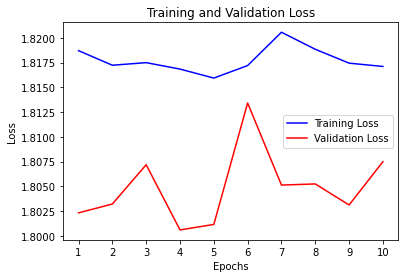

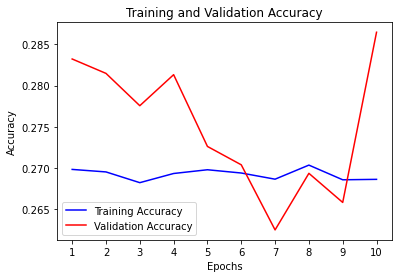

In [7]:
model=model_obj.fit_neural_network(model,X_train,y_train,X_val,y_val)

In [8]:
predict_on_pair=model_obj.prediction_test_pairs(test_df,10,12)
predict_on_pair[0]

'184-196'

In [9]:
test_df[test_df['L-F_Pair'].isin(predict_on_pair)]

,Local_Y,v_Class,v_Vel,v_Acc,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,L-F_Pair,...,preceding_Vehicle_Velocity,preceding_Vehicle_Acceleration,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition
14171,10.492435,2,12.192000,0.000000,us-101,18.973801,1.556250,0.676656,-1.368552,184-196,...,11.515344,1.368552,35.104122,2.0,0.000000,45.0,1,0.0,12.192,16.588436
14205,11.711636,2,12.192000,0.000000,us-101,18.918936,1.551750,0.579120,-0.524256,184-196,...,11.612880,0.524256,36.268150,2.0,0.100000,45.0,1,0.0,12.192,17.807634
14296,12.930531,2,12.192000,0.000000,us-101,18.867121,1.547500,0.545592,-0.015240,184-196,...,11.646408,0.015240,37.435841,2.0,0.200000,45.0,1,0.0,12.192,19.026834
14335,14.150035,2,12.192000,0.000000,us-101,18.812256,1.543000,0.545592,0.060960,184-196,...,11.646408,-0.060960,38.601395,2.0,0.300000,45.0,1,0.0,12.192,20.245729
14413,15.369235,2,12.192000,0.000000,us-101,18.757393,1.538500,0.542544,-0.109728,184-196,...,11.649456,0.109728,39.764210,2.0,0.400000,45.0,1,0.0,12.192,21.464930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930635,353.553680,2,16.773144,0.000000,us-101,54.647591,3.258041,0.487680,-0.036576,184-196,...,16.285463,0.036576,413.839447,2.0,44.599998,45.0,1,0.0,0.000,0.000000
930688,355.230988,2,16.773144,0.021336,us-101,54.595776,3.254952,0.481584,-0.173736,184-196,...,16.291559,0.195072,415.466492,2.0,44.700001,45.0,1,0.0,0.000,0.000000
930766,356.912262,2,16.733521,-0.624840,us-101,54.547009,3.259745,0.426720,-0.694944,184-196,...,16.306801,0.070104,417.097778,2.0,44.799999,45.0,1,0.0,0.000,0.000000
930852,358.590790,2,16.602455,-1.908048,us-101,54.498241,3.282541,0.286512,-1.969008,184-196,...,16.315945,0.060960,418.729065,2.0,44.900002,45.0,1,0.0,0.000,0.000000


In [10]:
'''features:
'Rear_to_Front_Space_Headway', 
'preceding_v_Class',
"v_Class",
'Velocity Difference_Following-Preceding',
 'v_Vel',
 'Location_cat']]
predicted_data = prediction(test_df, predict_on_pair, target_variable, model,0.1)
'''
def prediction(test_df,test_range,target_variable,model,time_frame):
    predicted_df = []
    #this loop runs for each pair required predictions. 
    for current_pair in test_range:
        #Assign shape of the predictions
        input_df = []
        input_df = test_df[test_df['L-F_Pair']== current_pair]
        spacing = np.zeros(input_df.shape[0])
        local_y_subject=np.zeros(input_df.shape[0])
        local_y_preceding=np.zeros(input_df.shape[0])
        dv = np.zeros(input_df.shape[0])
        vel=np.zeros(input_df.shape[0])
        pred_acc = np.zeros(input_df.shape[0])
        
        #updating the values for first Predictions
        vel[0]=input_df.iloc[0]['v_Vel']
        spacing[0] = input_df.iloc[0]['Rear_to_Front_Space_Headway']
        dv[0] = input_df.iloc[0]['Velocity Difference_Following-Preceding']   

        pred_acc[0] = input_df.iloc[0]['v_Acc']
        local_y_subject[0]=input_df.iloc[0]['Local_Y']
        local_y_preceding[0]=input_df.iloc[0]['preceding_Local_Y']
        preceding_vehicle_class=input_df.iloc[0]['preceding_v_Class']
        vehicle_class=input_df.iloc[0]['v_Class']
        #vehicle_combination= input_df.iloc[0]['Vehicle_combination_cat']
        length_preceding_vehicle=input_df.iloc[0]['preceding_vehicle_length']
        location=input_df.iloc[0]['Location_cat']
        
        #predicting first value of acceleration
             
        predict_for_input=np.array([spacing[0],preceding_vehicle_class,vehicle_class,dv[0],vel[0],location]).reshape(1,-1)        
        pred_acc[1] = model.predict(predict_for_input)
        #calculating vel,frspacing,local.y,dv from the predicted acceleration.
        
        for j in range(1,len(input_df)):
        # v= u + at
            vel[j] = vel[j-1]+(pred_acc[j-1]*time_frame)
        
        #dv=current velocity of subject - velocity of Lead/Preceding
            dv[j] = vel[j] - input_df.iloc[j]['preceding_Vehicle_Velocity']
        
        #distance travelled by vehicle. :s 
        # s = ut + 0.5*a*t^2
            s_subject= ((vel[j-1]*time_frame) + (0.5*pred_acc[j-1]*pow(time_frame,2)))
            
            #s_lead= ((input_df.iloc[j-1]['preceding_Vehicle_Velocity']*time_frame) + (0.5*input_df.iloc[j-1]['preceding_Vehicle_Acceleration']*pow(time_frame,2)))
            
            local_y_subject[j]=  local_y_subject[j-1] + s_subject
            #spacing[j] = spacing[j-1]+ s_lead- s_subject
            local_y_preceding[j]=  input_df.iloc[j-1]['preceding_Local_Y']
            spacing[j]=local_y_preceding[j] - local_y_subject[j] - input_df.iloc[j-1]['preceding_Local_Y'] -length_preceding_vehicle
            print(f"s_subject: {s_subject},local_y_subject:{local_y_subject[j]},local_y_preceding: {local_y_preceding[j]},spacing[j]:{spacing[j]}")
            if j == len(input_df)-1: # as we are predicting the next values, we should not predict for the last one. 
                break
            #if j == 5: # this is temporary
            #    break
            
            predict_for_input=np.array([spacing[j],preceding_vehicle_class,vehicle_class,dv[j],vel[j],location]).reshape(1,-1)
            #pred_acc[j+1] = model.predict(np.array([spacing[j],vehicle_combination,local_y[j],dv[j],vel[j]])) 
            pred_acc[j+1] = model.predict(predict_for_input) 
            print(f"j: {j},predict_for_input:{predict_for_input},pred_acc: {pred_acc[j+1]}")

             ########
             #print(pred_acc)
             ########
        
        print(f"input_df shape: {input_df.shape}")
        print(f"pred_acc shape: {pred_acc.shape}")
        input_df['predicted_acceleration']=pred_acc
        input_df['predicted_velocity']=vel

        predicted_df.append(input_df)
        result = pd.concat(predicted_df)
    return result

In [11]:
target_variable = 'nextframeAcc'

predicted_data = prediction(test_df, predict_on_pair, target_variable, model,time_frame)

s_subject: 6.0960001945495605,local_y_subject:16.588435649871826,local_y_preceding: 35.104122161865234,spacing[j]:-22.227235794067383
j: 1,predict_for_input:[[-22.22723579   2.           2.           0.57912064  12.19200039
    1.        ]],pred_acc: 0.00010396707511972636
s_subject: 6.0960131904339505,local_y_subject:22.684448840305777,local_y_preceding: 36.268150329589844,spacing[j]:-28.323248984501333
j: 2,predict_for_input:[[-28.32324898   2.           2.           0.54564429  12.19205237
    1.        ]],pred_acc: 0.00010396716970717534
s_subject: 6.0960391822027304,local_y_subject:28.780488022508507,local_y_preceding: 37.43584060668945,spacing[j]:-34.419288166704064
j: 3,predict_for_input:[[-34.41928817   2.           2.           0.54569628  12.19210436
    1.        ]],pred_acc: 0.00010396716970717534
s_subject: 6.096065173983334,local_y_subject:34.87655319649184,local_y_preceding: 38.60139465332031,spacing[j]:-40.5153533406874
j: 4,predict_for_input:[[-40.51535334   2.        

In [12]:
predicted_data

,Local_Y,v_Class,v_Vel,v_Acc,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,L-F_Pair,...,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition,predicted_acceleration,predicted_velocity
14171,10.492435,2,12.192000,0.000000,us-101,18.973801,1.556250,0.676656,-1.368552,184-196,...,35.104122,2.0,0.000000,45.000000,1,0.0,12.192,16.588436,0.000000,12.192000
14205,11.711636,2,12.192000,0.000000,us-101,18.918936,1.551750,0.579120,-0.524256,184-196,...,36.268150,2.0,0.100000,45.000000,1,0.0,12.192,17.807634,0.000104,12.192000
14296,12.930531,2,12.192000,0.000000,us-101,18.867121,1.547500,0.545592,-0.015240,184-196,...,37.435841,2.0,0.200000,45.000000,1,0.0,12.192,19.026834,0.000104,12.192052
14335,14.150035,2,12.192000,0.000000,us-101,18.812256,1.543000,0.545592,0.060960,184-196,...,38.601395,2.0,0.300000,45.000000,1,0.0,12.192,20.245729,0.000104,12.192104
14413,15.369235,2,12.192000,0.000000,us-101,18.757393,1.538500,0.542544,-0.109728,184-196,...,39.764210,2.0,0.400000,45.000000,1,0.0,12.192,21.464930,0.000104,12.192156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46804,483.812683,2,15.535656,-3.413760,us-101,65.575691,4.220980,-2.657856,-2.453640,212-225,...,554.162354,2.0,37.500000,37.900002,1,0.0,0.000,0.000000,0.000103,17.894664
46915,485.349182,2,15.148560,-3.413760,us-101,65.850006,4.346948,-2.996184,-3.044952,212-225,...,555.973816,2.0,37.599998,37.900002,1,0.0,0.000,0.000000,0.000104,17.894716
46940,486.834473,2,14.904720,-1.514856,us-101,66.167000,4.439332,-3.297936,-2.889504,212-225,...,557.775452,2.0,37.700001,37.900002,1,0.0,0.000,0.000000,0.000104,17.894768
47081,488.305756,2,14.828520,0.219456,us-101,66.508377,4.485166,-3.590544,-2.913888,212-225,...,559.590576,2.0,37.799999,37.900002,1,0.0,0.000,0.000000,0.000104,17.894820


In [13]:
prediction1 = predicted_data[predicted_data["L-F_Pair"]== predict_on_pair[0]]
prediction1

,Local_Y,v_Class,v_Vel,v_Acc,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,L-F_Pair,...,preceding_Local_Y,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition,predicted_acceleration,predicted_velocity
14171,10.492435,2,12.192000,0.000000,us-101,18.973801,1.556250,0.676656,-1.368552,184-196,...,35.104122,2.0,0.000000,45.0,1,0.0,12.192,16.588436,0.000000,12.192000
14205,11.711636,2,12.192000,0.000000,us-101,18.918936,1.551750,0.579120,-0.524256,184-196,...,36.268150,2.0,0.100000,45.0,1,0.0,12.192,17.807634,0.000104,12.192000
14296,12.930531,2,12.192000,0.000000,us-101,18.867121,1.547500,0.545592,-0.015240,184-196,...,37.435841,2.0,0.200000,45.0,1,0.0,12.192,19.026834,0.000104,12.192052
14335,14.150035,2,12.192000,0.000000,us-101,18.812256,1.543000,0.545592,0.060960,184-196,...,38.601395,2.0,0.300000,45.0,1,0.0,12.192,20.245729,0.000104,12.192104
14413,15.369235,2,12.192000,0.000000,us-101,18.757393,1.538500,0.542544,-0.109728,184-196,...,39.764210,2.0,0.400000,45.0,1,0.0,12.192,21.464930,0.000104,12.192156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930635,353.553680,2,16.773144,0.000000,us-101,54.647591,3.258041,0.487680,-0.036576,184-196,...,413.839447,2.0,44.599998,45.0,1,0.0,0.000,0.000000,0.000103,21.414272
930688,355.230988,2,16.773144,0.021336,us-101,54.595776,3.254952,0.481584,-0.173736,184-196,...,415.466492,2.0,44.700001,45.0,1,0.0,0.000,0.000000,0.000104,21.414324
930766,356.912262,2,16.733521,-0.624840,us-101,54.547009,3.259745,0.426720,-0.694944,184-196,...,417.097778,2.0,44.799999,45.0,1,0.0,0.000,0.000000,0.000104,21.414376
930852,358.590790,2,16.602455,-1.908048,us-101,54.498241,3.282541,0.286512,-1.969008,184-196,...,418.729065,2.0,44.900002,45.0,1,0.0,0.000,0.000000,0.000104,21.414428


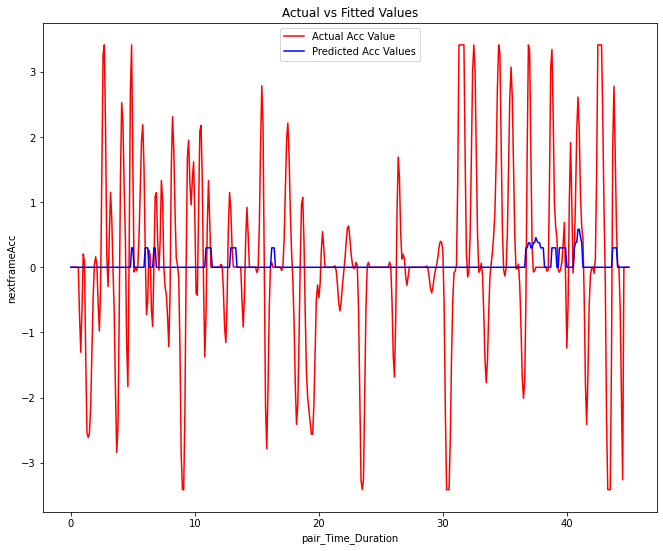

In [14]:
plt.figure(figsize=(11, 9))


ax = sns.lineplot(x=prediction1["pair_Time_Duration"], y = prediction1["nextframeAcc"], color="r", label="Actual Acc Value")
sns.lineplot(x=prediction1["pair_Time_Duration"], y =prediction1["predicted_acceleration"],  color="b", label="Predicted Acc Values" )


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()



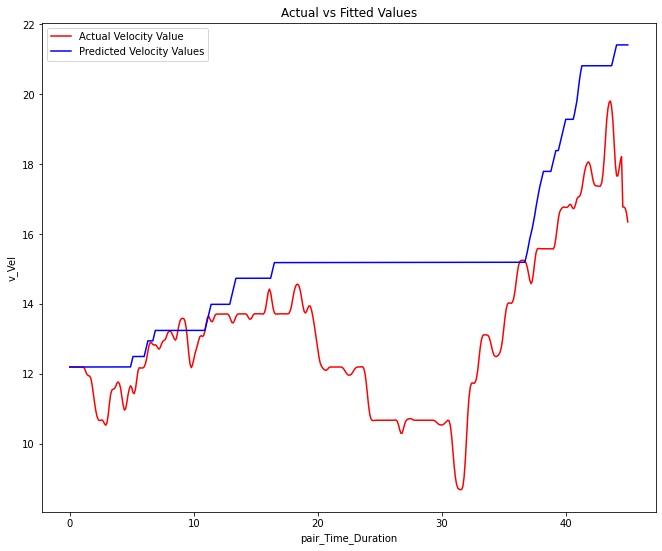

In [15]:
plt.figure(figsize=(11, 9))


ax = sns.lineplot(x=prediction1["pair_Time_Duration"], y = prediction1["v_Vel"], color="r", label="Actual Velocity Value")
sns.lineplot(x=prediction1["pair_Time_Duration"], y =prediction1["predicted_velocity"],  color="b", label="Predicted Velocity Values" )


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [16]:
ngsim.columns

Index(['Local_Y', 'v_Class', 'v_Vel', 'v_Acc', 'Location',
       'Rear_to_Front_Space_Headway', 'Front_To_Rear_Time_Headway',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'preceding_vehicle_length', 'preceding_Vehicle_Velocity',
       'preceding_Vehicle_Acceleration', 'preceding_Local_Y',
       'preceding_v_Class', 'pair_Time_Duration', 'total_pair_duration',
       'Location_cat', 'nextframeAcc', 'nextframesvel', 'nextframeposition'],
      dtype='object')